In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
wt = pd.read_csv("WebtoonLR2 (1).csv")

In [3]:
wt

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30600000,Romance,9.62,4200000,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39900000,Romance,9.60,6400000,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10400000,Romance,9.81,2100000,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25900000,Romance,9.79,3500000,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9900000,Supernatural,9.85,1500000,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...
...,...,...,...,...,...,...,...,...,...,...
564,564,Third Shift Society,Meredith Moriarty,866428,Supernatural,9.78,376900,"Life's funny. One minute you're jobless, deep ...",UP EVERY FRIDAY,https://www.webtoons.com/en/supernatural/third...
565,565,Adamsville,Michael Regina,184981,Mystery,9.32,60400,"""Adamsville"" is an all ages series about two m...",COMPLETED,https://www.webtoons.com/en/mystery/adamsville...
566,566,WEBTOON Now,LOZOLZ / Wyatt the Cat,1900000,Informative,9.25,459200,Get your WEBTOON news here!,UP EVERY MONDAY,https://www.webtoons.com/en/tiptoon/webtoon-no...
567,567,Staying Healthy Together,Various Artists,1500000,Informative,9.76,204600,A series of tips for staying safe during the C...,COMPLETED,https://www.webtoons.com/en/tiptoon/staying-he...


In [4]:
wt.columns

Index(['id', 'Name', 'Writer', 'Likes', 'Genre', 'Rating', 'Subscribers',
       'Summary', 'Update', 'Reading Link'],
      dtype='object')

In [5]:
wt.head()

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30600000,Romance,9.62,4200000,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39900000,Romance,9.60,6400000,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10400000,Romance,9.81,2100000,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25900000,Romance,9.79,3500000,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9900000,Supernatural,9.85,1500000,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [6]:
wt.describe()

,id,Likes,Rating,Subscribers
count,569.000000,5.690000e+02,569.000000,5.690000e+02
mean,284.000000,1.882686e+08,9.418998,4.786225e+05
std,164.400426,2.717342e+09,0.557571,6.805814e+05
min,0.000000,3.440000e+02,5.410000,1.700000e+03
25%,142.000000,2.696760e+05,9.310000,1.131000e+05
50%,284.000000,9.565540e+05,9.580000,2.549000e+05
75%,426.000000,3.454345e+06,9.730000,5.564000e+05
max,568.000000,5.192300e+10,9.930000,6.400000e+06


In [7]:
wt.shape

(569, 10)

In [8]:
np.mean(wt['Rating'])

9.41899824253074

In [9]:
wt['Writer'].unique()

array(['Leeanne M. Krecic (Mongie)', 'Yaongyi', 'Lilydusk', 'Enjelicious',
       'Lina Im / Jeonghyeon Kim', 'Emma Krogell', 'Paola Batalla',
       'YC / Rakyeon', 'Wishroomness', 'Quimchee', 'Lee Yone',
       'Colourbee', 'Seokwoo', 'SAM', 'Remin', 'Jungyoon / Taegeon',
       'Got W / Jocobong', 'SEOPASS / RAZEN', 'Carnby Kim / Hongpil',
       'Sophia', 'Miranda Mundt', 'Yongtaek Chae / GARAM HAN',
       'Taejun Pak', 'Ink. / Hyerim Sung', 'Ephemerys / Sophism',
       'Morangji', 'MaracuyasArt', 'LuckS', '2F', 'HONGDUCK / NEMONE',
       'Violet Karim', 'Nakano Mayaka', 'Maenggi Ki',
       'the gom (happybooks2u) / jungmi', 'Taejun Pak / Kim Junghyun',
       'Yunana / Heabun', 'Jjolee', 'MiTi / GUGU', 'Junk Ren / WmW',
       'Honey B', 'ARI', 'MARO / kang jaegeon', 'Cafelatte / JINHA',
       'MURO', 'Gisong / NemGa', 'echorise', 'Kawai Aporo',
       'Chihiro Howe', 'Pani', 'Songah Min',
       'Juin Kim / Taejun Pak Webtoon Company', 'WasakBasak / JANE',
       'Nawa', 'Me

In [10]:
wt[wt['Writer'] == 'ARI']

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
40,40,To You Who Swallowed a Star,ARI,1500000,Romance,9.51,321900,When Jiu Seo moves out of her childhood friend...,UP EVERY MONDAY,https://www.webtoons.com/en/romance/to-you-who...


In [28]:
df = wt[['Name','Rating', 'Genre', 'Summary']]
df.head(3)

,Name,Rating,Genre,Summary
0,Let's Play,9.62,Romance,"She's young, single and about to achieve her d..."
1,True Beauty,9.60,Romance,"After binge-watching beauty videos online, a s..."
2,Midnight Poppy Land,9.81,Romance,After making a grisly discovery in the country...


In [11]:
columns = ["Name", "Writer", "Genre", "Update", "Summary"]
wt[columns].head(3)

,Name,Writer,Genre,Update,Summary
0,Let's Play,Leeanne M. Krecic (Mongie),Romance,UP EVERY TUESDAY,"She's young, single and about to achieve her d..."
1,True Beauty,Yaongyi,Romance,UP EVERY WEDNESDAY,"After binge-watching beauty videos online, a s..."
2,Midnight Poppy Land,Lilydusk,Romance,UP EVERY SATURDAY,After making a grisly discovery in the country...


In [12]:
wt[columns].isnull().sum()

Name       0
Writer     1
Genre      0
Update     0
Summary    0
dtype: int64

In [13]:
mean_genre= wt.groupby('Genre')['Rating'].mean()
mean_genre

Genre
Action           9.577447
Comedy           9.148846
Drama            9.537167
Fantasy          9.531474
Heartwarming     9.675000
Historical       9.450000
Horror           9.516000
Informative      9.360000
Mystery          9.476667
Romance          9.544778
Sci-fi           9.394375
Slice of life    9.226122
Sports           9.171000
Superhero        8.908077
Supernatural     9.419394
Thriller         9.438857
Name: Rating, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Genre'>

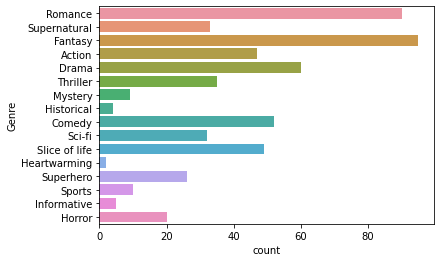

In [14]:
sns.countplot(y="Genre",data=wt)

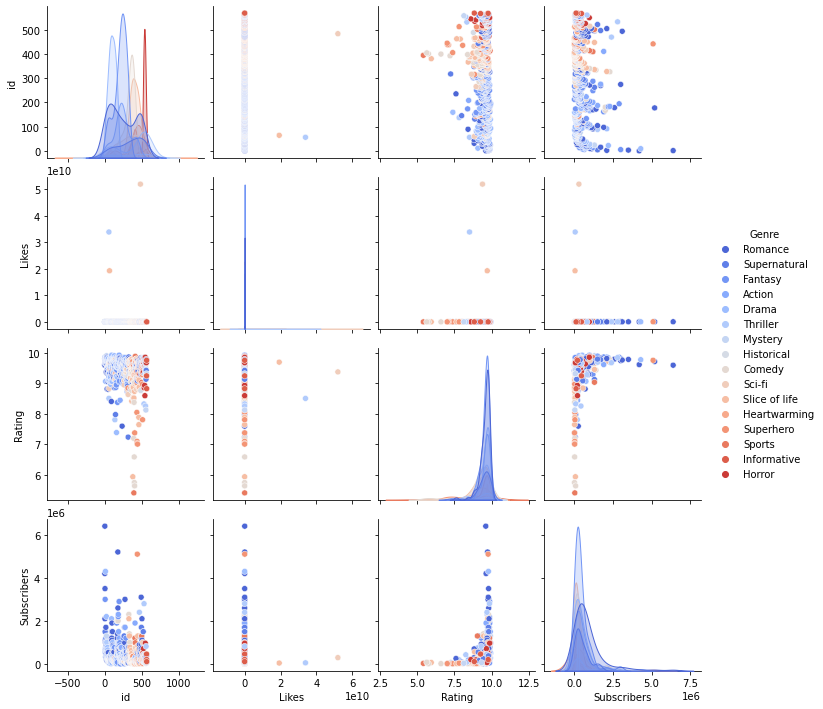

In [15]:
sns.pairplot(wt,hue='Genre',palette="coolwarm")

<AxesSubplot:>

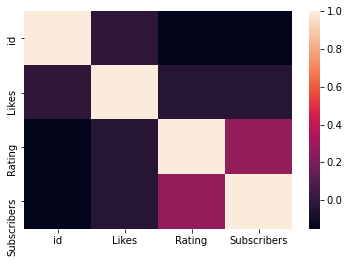

In [18]:
sns.heatmap(wt.corr())

<AxesSubplot:xlabel='Rating', ylabel='id'>

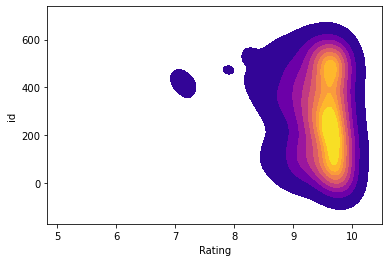

In [19]:
sns.kdeplot(x='Rating', y='id', data=wt, cmap = 'plasma', shade=True, thresh=0.05)